In [1]:
import greedy_algorithm
import celf
import celfpp
import simulated_annealing
import genetic_algorithm
import artificial_bee_colony_optimization

In [2]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from igraph import Graph  
from tqdm import tqdm
from itertools import product
import itertools 
import pandas as pd
import heapq
import copy

In [3]:
df = pd.read_csv('dataset/com-youtube.ungraph.txt.gz', compression='gzip', names=["source", "target"], sep='\t', quotechar='"', error_bad_lines=False)
print(df.head(10))

   source  target
0       1       4
1       1       5
2       1       6
3       1       7
4       1       8
5       1       9
6       1      10
7       1      11
8       1      12
9       1      13


In [4]:
df['source'] = df['source'].astype(int)
df['target'] = df['target'].astype(int)

In [5]:
df=df-[1,1]

In [6]:
df.min()

source    0
target    3
dtype: int64

In [7]:
df.max()

source    1157803
target    1157826
dtype: int64

In [8]:
com_youtube_network=Graph(directed=True)
com_youtube_network.add_vertices(1157827)
com_youtube_network.add_edges(zip(df["source"], df["target"]))
print("Number of vertices in the graph:",com_youtube_network.vcount())
print("Number of edges in the graph",com_youtube_network.ecount())
print("Is the graph directed:", com_youtube_network.is_directed())
print("Maximum degree in the graph:", com_youtube_network.maxdegree())

Number of vertices in the graph: 1157827
Number of edges in the graph 2987622
Is the graph directed: True
Maximum degree in the graph: 28754


In [9]:
com_youtube_network.summary()

'IGRAPH D--- 1157827 2987622 -- '

In [10]:
graph=com_youtube_network
# brute_force_spreads1=[] 
# brute_force_elapsed1=[] 
# greedy_spreads1=[] 
# greedy_elapsed1=[] 
# celf_spreads1=[] 
# celf_elapsed1=[] 
# celfpp_spreads1=[] 
# celfpp_elapsed1=[]
simulated_annealing_spreads1=[] 
simulated_annealing_elapsed1=[] 
genetic_algorithm_spreads1=[] 
genetic_algorithm_elapsed1=[]
artificial_bee_colony_optimization_spreads1=[]
artificial_bee_colony_optimization_elapsed1=[]
lower_seed_size,higher_seed_size=50,56
for i in tqdm(range(lower_seed_size,higher_seed_size,1)):
    k = i
    prob = 0.1
    n_iters =10
    #brute_force_solution,brute_force_spreads,brute_force_elapsed=brute_force(graph,k,prob,n_iters)
    #greedy_solution, greedy_spreads, greedy_elapsed = greedy_algorithm.algo(graph, k, prob, n_iters)
#     celf_solution, celf_spreads, celf_elapsed= celf.algo(graph, k, prob, n_iters)
#     celfpp_solution, celfpp_spreads, celfpp_elapsed = celfpp.algo(graph, k, prob, n_iters)
    simulated_annealing_solution,simulated_annealing_spreads,simulated_annealing_elapsed=simulated_annealing.algo(graph,k,prob,n_iters)
    generation_count=20
    population_size=100
    genetic_algorithm_solution,genetic_algorithm_spreads,genetic_algorithm_elapsed=genetic_algorithm.algo(graph,generation_count,population_size,k)
    
#     artificial_bee_colony_optimization_solution,artificial_bee_colony_optimization_spreads,artificial_bee_colony_optimization_elapsed=artificial_bee_colony_optimization.algo(graph,k,prob,n_iters)



    #brute_force_spreads1.append(brute_force_spreads) 
    #brute_force_elapsed1.append(brute_force_elapsed) 
    
#     greedy_spreads1.append(greedy_spreads)
#     greedy_elapsed1.append(greedy_elapsed)
    
#     celf_spreads1.append(celf_spreads) 
#     celf_elapsed1.append(celf_elapsed)
    
#     celfpp_spreads1.append(celfpp_spreads) 
#     celfpp_elapsed1.append(celfpp_elapsed)
    
    simulated_annealing_spreads1.append(simulated_annealing_spreads) 
    simulated_annealing_elapsed1.append(simulated_annealing_elapsed)
    genetic_algorithm_spreads1.append(genetic_algorithm_spreads) 
    genetic_algorithm_elapsed1.append(genetic_algorithm_elapsed)
#     artificial_bee_colony_optimization_spreads1.append(artificial_bee_colony_optimization_spreads) 
#     artificial_bee_colony_optimization_elapsed1.append(artificial_bee_colony_optimization_elapsed)

100%|██████████| 6/6 [2:28:07<00:00, 1481.28s/it]  


In [11]:
x=list(range(lower_seed_size,higher_seed_size,1))

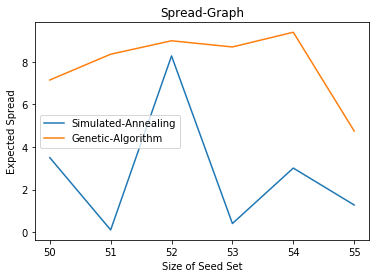

In [12]:
# plotting the points  
#plt.plot(x, y1,label="Brute-force") 

# plt.plot(x, greedy_spreads1,label="Greedy")

# plt.plot(x, celf_spreads1,label="CELF")

# plt.plot(x, celfpp_spreads1,label="CELF++")

plt.plot(x, simulated_annealing_spreads1,label="Simulated-Annealing")
plt.plot(x, genetic_algorithm_spreads1,label="Genetic-Algorithm")
# plt.plot(x, artificial_bee_colony_optimization_spreads1,label="Artificial-Bee-Colony-Optimization")
# naming the x axis 
plt.xlabel('Size of Seed Set') 
# naming the y axis 
plt.ylabel('Expected Spread') 
  
# giving a title to my graph 
plt.title('Spread-Graph') 
plt.legend()
# function to show the plot 
plt.show() 

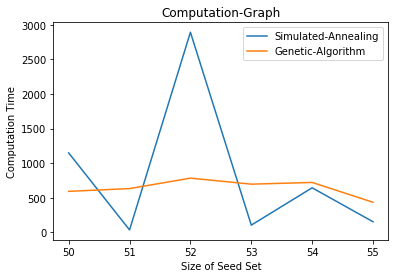

In [13]:
# plotting the points 
#plt.plot(x, brute_force_elapsed1,label="Brute-force") 

# plt.plot(x, greedy_elapsed1,label="Greedy")

# plt.plot(x, celf_elapsed1,label="CELF")

# plt.plot(x, celfpp_elapsed1,label="CELF++")

plt.plot(x, simulated_annealing_elapsed1,label="Simulated-Annealing")
plt.plot(x, genetic_algorithm_elapsed1,label="Genetic-Algorithm")
# plt.plot(x, artificial_bee_colony_optimization_elapsed1,label="Artificial-Bee-Colony-Optimization")
# naming the x axis 
plt.xlabel('Size of Seed Set') 
# naming the y axis 
plt.ylabel('Computation Time') 
  
# giving a title to my graph 
plt.title('Computation-Graph') 
plt.legend()
# function to show the plot 
plt.show() 